In [2]:
import datetime

current_datetime=datetime.datetime.now()
print(f"Calf was last happy on: {current_datetime.strftime('%Y-%m-%d %H:%M:%S')}")

Calf was last happy on: 2023-08-18 12:16:35


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import os
import random
import io
import imageio
import glob
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage
import tensorflow as tf
import pathlib
import itertools
import random

from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

from object_detection.utils import config_util
from object_detection.builders import model_builder
%matplotlib inline

2023-08-18 12:16:35.770509: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-18 12:16:35.801475: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-18 12:16:36.350782: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-08-18 12:16:37.247047: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-18 12:16:37.265584: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-18 12:16:37.265744: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [5]:
# Download EfficientDet model
import wget
model_link = "http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz"
model_tar_name="efficientdet_d0_coco17_tpu-32.tar.gz"

# Check if model is already downloadeds
if not os.path.exists(model_tar_name):
    wget.download(model_link)
    # Unzip
    !tar -zxvf {model_tar_name} 


In [6]:
CUSTOM_MODEL_NAME='my_efficientdet_d0'
PRETRAINED_MODEL_NAME='efficientdet_d0_coco17_tpu-32'
TF_RECORD_SCRIPT_NAME='generate_tfrecord.py'
LABEL_MAP_NAME='label_map.pbtxt'

# Setting up the folders
IMAGES_PATH=os.path.join('Tensorflow','workspace','images','collected_images')
print(IMAGES_PATH)


Tensorflow/workspace/images/collected_images


In [7]:
# Console command for creating tfrecords from coco dataset:

    
python_path = "python3 Calf_Detection/efficient_det/create_coco_tf_record.py"
log_param = "--logtostderr"
train_image_dir = "--train_image_dir=Calf_Detection/efficient_det/data/train"
test_image_dir = "--test_image_dir=Calf_Detection/efficient_det/data/test"
train_annotations_file = "--train_annotations_file=Calf_Detection/efficient_det/data/train/train.json"
test_annotations_file = "--test_annotations_file=Calf_Detection/efficient_det/data/test/test.json"
output_dir = "--output_dir=Calf_Detection/efficient_det/data/tf_records"

print(f"{python_path} {log_param} \\\n"
      f"      {train_image_dir} \\\n"
      f"      {test_image_dir} \\\n"
      f"      {train_annotations_file} \\\n"
      f"      {test_annotations_file} \\\n"
      f"      {output_dir}")


python3 Calf_Detection/efficient_det/create_coco_tf_record.py --logtostderr \
      --train_image_dir=Calf_Detection/efficient_det/data/train \
      --test_image_dir=Calf_Detection/efficient_det/data/test \
      --train_annotations_file=Calf_Detection/efficient_det/data/train/train.json \
      --test_annotations_file=Calf_Detection/efficient_det/data/test/test.json \
      --output_dir=Calf_Detection/efficient_det/data/tf_records


In [8]:
python_path = "python3"
script_path = "efficient_det/create_coco_tf_record.py"
log_param = "--logtostderr"
train_image_dir = "--train_image_dir=efficient_det/data/train"
test_image_dir = "--test_image_dir=efficient_det/data/test"
train_annotations_file = "--train_annotations_file=efficient_det/data/train/train.json"
test_annotations_file = "--test_annotations_file=efficient_det/data/test/test.json"
output_dir = "--output_dir=efficient_det/data/tf_records"

command = (
    f"{python_path} {script_path} "
    f"{log_param} "
    f"{train_image_dir} "
    f"{test_image_dir} "
    f"{train_annotations_file} "
    f"{test_annotations_file} "
    f"{output_dir}"
)

#
# !{command}


In [9]:
env_vars = os.environ.copy()

# Loop through and print each variable
for var in env_vars:
    print(f'{var}: {env_vars[var]}')

CHROME_DESKTOP: code-url-handler.desktop
CONDA_DEFAULT_ENV: tf_od
CONDA_EXE: /home/nilai/anaconda3/bin/conda
CONDA_PREFIX: /home/nilai/anaconda3/envs/tf_od
CONDA_PROMPT_MODIFIER: (tf_od) 
CONDA_PYTHON_EXE: /home/nilai/anaconda3/bin/python
CONDA_SHLVL: 2
DBUS_SESSION_BUS_ADDRESS: unix:path=/run/user/1000/bus
DEFAULTS_PATH: /usr/share/gconf/pop.default.path
DESKTOP_SESSION: pop
DISPLAY: :1
GDK_BACKEND: x11
GDMSESSION: pop
GIO_LAUNCHED_DESKTOP_FILE: /usr/share/applications/code.desktop
GIO_LAUNCHED_DESKTOP_FILE_PID: 13449
GJS_DEBUG_OUTPUT: stderr
GJS_DEBUG_TOPICS: JS ERROR;JS LOG
GNOME_DESKTOP_SESSION_ID: this-is-deprecated
GNOME_SHELL_SESSION_MODE: pop
GPG_AGENT_INFO: /run/user/1000/gnupg/S.gpg-agent:0:1
GTK_IM_MODULE: ibus
GTK_MODULES: gail:atk-bridge
HOME: /home/nilai
INVOCATION_ID: b09c65e47b3c48d69e04d44e16b72f98
JAVA_HOME: /home/nilai/jdk-17.0.7+7
JOURNAL_STREAM: 8:53192
LANG: en_US.UTF-8
LESSCLOSE: /usr/bin/lesspipe %s %s
LESSOPEN: | /usr/bin/lesspipe %s
LOGNAME: nilai
MANAGERPID: 

In [10]:
# Training the model
# !python3 ./models/research/object_detection/model_main_tf2.py\
#     --pipeline_config_path=./efficient_det/efficientdet_d0_coco17_tpu-32.config \
#     --model_dir=./training_efficient_det \
#     --alsologtostderr

In [11]:
## Some bugs in VSCODE fogit sr inline tensorbaord 

# cd /Projects/OD_Pipeline/Calf_Detection/training_efficient_det

## If existing tensorboard process is running, kill it
# ps aux | grep tensorboard

## Start tensorboard process, from training_efficient_det directory
# tensorboard --logdir=.

In [12]:
# Export the model
pipeline_file = 'efficient_det/efficientdet_d0_coco17_tpu-32.config'
last_model_path = 'training_efficient_det'
output_directory = "finetuned_efficient_det"
!python3 models/research/object_detection/exporter_main_v2.py \
    --trained_checkpoint_dir {last_model_path} \
    --output_directory {output_directory} \
    --pipeline_config_path {pipeline_file}

/bin/bash: /home/nilai/anaconda3/envs/tf_od/lib/libtinfo.so.6: no version information available (required by /bin/bash)
2023-08-18 12:16:37.525288: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-18 12:16:37.554809: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-18 12:16:38.079683: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-18 12:16:39.115049: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had

In [13]:
# Load an image from file into a Numpy array.
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.
  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.
  Args:
    path: a file path.
  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [14]:
def plot_detections(image_np,
                    boxes,
                    classes,
                    scores,
                    category_index,
                    figsize=(12, 16),
                    image_name=None):
  image_np_with_annotations = image_np.copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_annotations,
      boxes,
      classes,
      scores,
      category_index,
      use_normalized_coordinates=True,
      min_score_thresh=0.8)
  if image_name:
    plt.imsave(image_name, image_np_with_annotations)
  else:
    plt.imshow(image_np_with_annotations)

In [15]:
filenames = list(pathlib.Path('./training_efficient_det/').glob('*.index'))

filenames.sort()
print(filenames)

# recover our saved model
model_dir = './training_efficient_det/'
# Adding the last checkpoint
configs = config_util.get_configs_from_pipeline_file(pipeline_file)
model_config = configs['model']
detection_model = model_builder.build(
      model_config=model_config, is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(
      model=detection_model)
ckpt.restore(os.path.join(str(filenames[-1]).replace('.index',''))).expect_partial()


def get_model_detection_function(model):
  """Get a tf.function for detection."""

  @tf.function
  def detect_fn(image):
    """Detect objects in image."""

    image, shapes = model.preprocess(image)
    prediction_dict = model.predict(image, shapes)
    detections = model.postprocess(prediction_dict, shapes)

    return detections, prediction_dict, tf.reshape(shapes, [-1])

  return detect_fn

detect_fn = get_model_detection_function(detection_model)

[PosixPath('training_efficient_det/ckpt-1.index'), PosixPath('training_efficient_det/ckpt-2.index')]


2023-08-18 12:17:18.776157: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-18 12:17:18.776368: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-18 12:17:18.776449: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [16]:
# map labels for inference decoding
label_map_path = configs['eval_input_config'].label_map_path
label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
    label_map,
    max_num_classes=label_map_util.get_max_label_map_index(label_map),
    use_display_name=True)
category_index = label_map_util.create_category_index(categories)
label_map_dict = label_map_util.get_label_map_dict(label_map, use_display_name=True)

2023-08-18 12:17:30.248490: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-18 12:17:30.300554: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-18 12:17:30.301299: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-18 12:17:30.301331: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:109] Couldn't get ptxas version : FAILED_PRECONDITION: Couldn't get ptxas/nvlink version string: INTERNAL: Couldn't invoke ptxas --version
2023-08-18 12:17:30.302122: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-18 12:17:30.302186: W tensorflow/compiler/xla/stream_executor/gpu/redzone_allocator.cc:318] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This mes

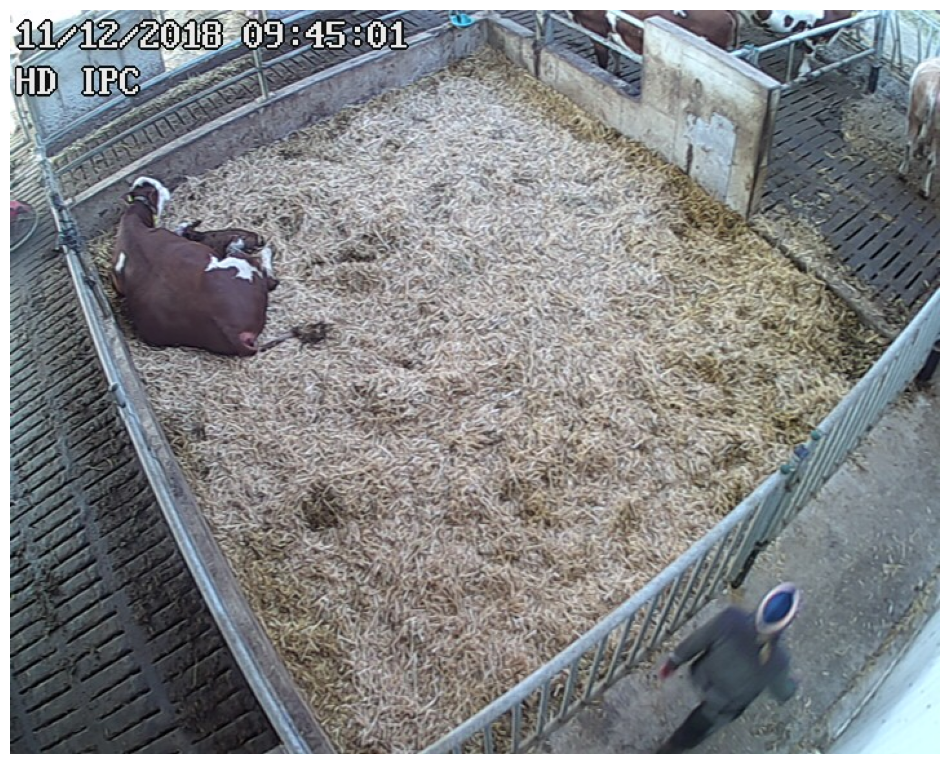

In [17]:
#run detector on test image
#it takes a little longer on the first run and then runs at normal speed. 
TEST_IMAGE_PATHS = glob.glob('images/images/2018-11-12_014501.jpg')
image_path = random.choice(TEST_IMAGE_PATHS)
image_np = load_image_into_numpy_array(image_path)

input_tensor = tf.convert_to_tensor(
    np.expand_dims(image_np, 0), dtype=tf.float32)
detections, predictions_dict, shapes = detect_fn(input_tensor)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'][0].numpy(),
      (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
      detections['detection_scores'][0].numpy(),
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=3,
      min_score_thresh=.6,
      agnostic_mode=False,
)

plt.figure(figsize=(12,16))
plt.imshow(image_np_with_detections)
plt.axis("off")
plt.show()

In [18]:
# Convert the model into TFLite:
# model_dir = './training/'
# # Adding the last checkpoint
# configs = config_util.get_configs_from_pipeline_file(pipeline_file)
# model_config = configs['model']
# detection_model = model_builder.build(
#       model_config=model_config, is_training=False)

# print()

: 